In [1]:
def round_off_rating(number):
    """Round a number to the closest half integer.
    >>> round_off_rating(1.3)
    1.5
    >>> round_off_rating(2.6)
    2.5
    >>> round_off_rating(3.0)
    3.0
    >>> round_off_rating(4.1)
    4.0"""

    return round(number * 2) / 2

def NormalizeData(data):
    """Normalize data to sum up to 1"""
    
    return (data)/(data).sum()

In [2]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
import pandas as pd
import seaborn as sns
import numpy as np

# generate a sample
train_df = pd.read_csv('/home/bill/ncaaf/model_training/preseason_model/temp/train_df.csv', index_col=0)
x_train = train_df[['play_success_off_FY_away',
    'yards_per_play_off_FY_away',
    'play_success_def_FY_away',
    'yards_per_play_def_FY_away',
    'play_success_off_FY-1_away',
    'yards_per_play_off_FY-1_away',
    'play_success_def_FY-1_away',
    'yards_per_play_def_FY-1_away',
    'play_success_off_FY-2_away',
    'yards_per_play_off_FY-2_away',
    'play_success_def_FY-2_away',
    'yards_per_play_def_FY-2_away',
    'play_success_off_FY_home',
    'yards_per_play_off_FY_home',
    'play_success_def_FY_home',
    'yards_per_play_def_FY_home',
    'play_success_off_FY-1_home',
    'yards_per_play_off_FY-1_home',
    'play_success_def_FY-1_home',
    'yards_per_play_def_FY-1_home',
    'play_success_off_FY-2_home',
    'yards_per_play_off_FY-2_home',
    'play_success_def_FY-2_home',
    'yards_per_play_def_FY-2_home']]

y_train = train_df['home_score_differential']

In [3]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time

data = []
firsts = list(range(10, 23))
seconds = list(range(11, 24))

for i, j in zip(firsts, seconds):
    i = '20' + str(i) + '-' + str(j)
    driver = webdriver.Chrome(ChromeDriverManager().install())
    URL = 'https://www.sportsbookreviewsonline.com/scoresoddsarchives/ncaa-football-'+i+'/'
    driver.get(URL)
    driver.maximize_window()
    page = driver.page_source
    time.sleep(3)
    driver.close()
    page_list = page.split('tbody')[1]
    new_list = page_list.split('<tr>')[1:]
    newer_list = []
    for k in new_list:
        if k == '>\n<':
            pass
        else:
            newer_list.append(k)

    cols = []
    for l, m in zip(newer_list, range(len(newer_list))):
        if l == '>\n':
            pass
        else:
            if m == 0:
                for n in l.split('<td>'):
                    if n == '>\n':
                        pass
                    cols.append(n.replace('</td>\n', '').replace('</', ''))
            else:
                for o in l.split('<td>'):
                    if o == '>\n':
                        pass
                    data.append(o.replace('</td>\n', '').replace('</', ''))
                data.append(i)

[WDM] - Downloading: 100%|██████████| 6.75M/6.75M [00:00<00:00, 18.8MB/s]
/tmp/ipykernel_19850/3335585499.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [4]:
import pandas as pd

new_data = []
for i in data:
    new_data.append(i.replace('tr>\n', ''))

data = new_data
particular_value = ''
result = []
temp_list = []
for i in data:
    i = i.split('\n')[0]
    if i == particular_value:
        temp_list.append(i)
        result.append(temp_list)
        temp_list = []
    else:
        temp_list.append(i)
result.append(temp_list)

df = pd.DataFrame(result).iloc[:, :-1]

new_cols = []
for i in cols:
    if i != '\n':
        new_cols.append(i.replace('tr>\n', ''))
new_cols.append('year')
df.columns = new_cols
df = df.dropna()

In [5]:
visitors = df.iloc[::2, :]
home = df.iloc[1::2, :]

In [6]:
home_cols = []
away_cols = []
for i, j in zip(list(home), list(visitors)):
    i = i.replace('tr>\n', '')
    home_cols.append('Home_' + i)
    away_cols.append('Away_' + j)
    
visitors.columns = away_cols
home.columns = home_cols

In [7]:
visitors['Away_VH'] = visitors['Away_VH'].replace('&nbsp;', 'V')

/tmp/ipykernel_19850/1953233982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visitors['Away_VH'] = visitors['Away_VH'].replace('&nbsp;', 'V')


In [8]:
#Concat the resulting dfs so that each game is on its own row
home.reset_index(drop=True, inplace=True)
visitors.reset_index(drop=True, inplace=True)
results = pd.concat([visitors, home], axis=1, sort=False)

In [9]:
results.to_csv('test.csv')

In [10]:
import numpy as np

spreads_and_scores = results#[['Home_Close', 
                            #  'Away_Close', 
                            #  'Home_Final', 
                            #  'Away_Final']]

spreads_and_scores = spreads_and_scores.replace('pk', '0')
spreads_and_scores = spreads_and_scores.replace('PK', '0')
spreads_and_scores = spreads_and_scores.replace('7-105', '7')
spreads_and_scores = spreads_and_scores.replace('3-115', '3')
spreads_and_scores = spreads_and_scores.replace('3-105', '3')
spreads_and_scores = spreads_and_scores.replace('1..5', '1.5')
spreads_and_scores = spreads_and_scores.replace('24,5', '24.5')
spreads_and_scores = spreads_and_scores[spreads_and_scores['Home_Final'] != '&nbsp;']
spreads_and_scores = spreads_and_scores[spreads_and_scores['Home_Final'] != 'NL']
spreads_and_scores = spreads_and_scores[spreads_and_scores['Away_Final'] != '&nbsp;']
spreads_and_scores = spreads_and_scores[spreads_and_scores['Away_Final'] != 'NL']
spreads_and_scores = spreads_and_scores[spreads_and_scores['Home_Close'] != '&nbsp;']
spreads_and_scores = spreads_and_scores[spreads_and_scores['Home_Close'] != 'NL']
spreads_and_scores = spreads_and_scores[spreads_and_scores['Away_Close'] != 'NL']

spreads_and_scores["Home_Close"] = pd.to_numeric(spreads_and_scores["Home_Close"])
spreads_and_scores["Away_Close"] = pd.to_numeric(spreads_and_scores["Away_Close"])
spreads_and_scores["Home_Final"] = pd.to_numeric(spreads_and_scores["Home_Final"])
spreads_and_scores["Away_Final"] = pd.to_numeric(spreads_and_scores["Away_Final"])


spreads_and_scores['Spread'] = np.where((spreads_and_scores['Home_Close'] < spreads_and_scores['Away_Close']), 
                                        spreads_and_scores['Home_Close']*-1, spreads_and_scores['Away_Close'])

spreads_and_scores['Home_Score_Dif'] = spreads_and_scores['Home_Final'] - spreads_and_scores['Away_Final']

In [11]:
spreads_and_scores['Dif_Check_Col'] = -spreads_and_scores['Home_Score_Dif']
spreads_and_scores['Spread_minus_Check_Col'] = spreads_and_scores['Spread'] - spreads_and_scores['Dif_Check_Col']
#spreads_and_scores.sort_values('Spread').to_csv('test.csv') #[['Spread', 'Home_Score_Dif']]

In [12]:
spreads_and_scores.to_csv('test2.csv')

In [13]:
print(spreads_and_scores.loc[spreads_and_scores['Spread'] == 16.5]['Spread_minus_Check_Col'].std())
print(spreads_and_scores.loc[spreads_and_scores['Spread'] == 16.5]['Spread_minus_Check_Col'].mean())

14.64027680469303
-0.22131147540983606


In [14]:
import matplotlib.pyplot as plt

probs = {}

spread_range = np.arange(min(spreads_and_scores['Spread']), max(spreads_and_scores['Spread'])+0.5, 0.5)
cols = ['Spread', 'Dif_Check_Col', 'Spread_minus_Check_Col']
spreads = []
max_liklihood = []
median_values = []
num_of_samples = []
for i in spread_range:
    try:
        spread_pred = i
        new_spread_range = np.arange(i-3, i+3.5, 0.5)
        # difs = spreads_and_scores.loc[spreads_and_scores['Spread'] == i][cols]
        difs = spreads_and_scores[spreads_and_scores['Spread'].isin(new_spread_range)][cols]

        # remove any outliers by finding any games that are a 3 sigma event
        difs_from_spreads_median = difs['Spread_minus_Check_Col'].median()
        difs_from_spreads_std = round(difs['Spread_minus_Check_Col'].std(), 1)
        difs_max = difs['Spread_minus_Check_Col'].max()
        difs_min = difs['Spread_minus_Check_Col'].min()
        pos_3_stds = round(difs_from_spreads_median + (difs_from_spreads_std*3), 1)
        neg_3_stds = round(difs_from_spreads_median - (difs_from_spreads_std*3), 1)
        no_outliers = difs.loc[(difs['Spread_minus_Check_Col'] < pos_3_stds) & 
                               (difs['Spread_minus_Check_Col'] > neg_3_stds)]

        # remove some more by finding those that have never occurred before
        # start by fitting density
        if len(no_outliers) != 0:
            kde = KernelDensity(bandwidth=1, kernel='linear')
            sample = np.array(no_outliers['Dif_Check_Col']).reshape((len(no_outliers), 1))

            kde.fit(sample)

            # sample probabilities for a range of outcomes
            values = asarray([value for value in np.arange(no_outliers['Dif_Check_Col'].min(), 
                                                           no_outliers['Dif_Check_Col'].max()+0.5, 
                                                           0.5)])

            probabilities = kde.score_samples(values.reshape((len(values), 1)))
            probabilities = exp(probabilities)

            # find all the times a spread has "zero" chance of happening
            cumcount = []
            count = 0
            for i in probabilities:
                if i == 0:
                    count = count + 1
                elif i != 0:
                    count = 0
                cumcount.append(count)

            probs = pd.DataFrame()
            probs['values'] = values
            probs['probs'] = NormalizeData(probabilities)
            probs['zero_count'] = cumcount

            # remove any sequence where there are 3 or more straight 0 probability numbers
            favored = probs.loc[probs['values'] <= 0]
            highest = favored['zero_count'].max()
            if highest >= 3:
                cutoff = list(favored.loc[favored['zero_count'] == highest]['values'])[-1] + 0.5
                favored = favored.loc[favored['values'] >= cutoff]

            # for underdogs
            underdogs = probs.loc[probs['values'] > 0]
            cutoff = list(underdogs.loc[underdogs['zero_count'] >= 3]['values'])
            if cutoff:
                underdogs = underdogs.loc[underdogs['values'] <= cutoff[0] - 1.5]

            #Concat the resulting dfs so that each game is on its own row
            new_df = pd.concat([favored, underdogs])[['values', 'probs']]

            #new_df['normalized_probs'] = NormalizeData(new_df['probs'])
            new_min, new_max = new_df['values'].min(), new_df['values'].max()+0.5, 

            kde = KernelDensity(bandwidth=1, kernel='linear')
            new_samples = []
            for i in list(no_outliers['Dif_Check_Col']):
                if i < new_min or i > new_max:
                    pass
                else:
                    new_samples.append(i)

            sample = np.array(new_samples).reshape((len(new_samples), 1))

            kde.fit(sample)

            # sample probabilities for a range of outcomes
            values = asarray([value for value in np.arange(new_min, new_max+0.5, 0.5)])

            probabilities = kde.score_samples(values.reshape((len(values), 1)))
            probabilities = exp(probabilities)

            new_probs = pd.DataFrame([values, probabilities]).T
            new_probs.columns = ['values', 'probabilities']
            new_probs['normalized_probs'] = NormalizeData(new_probs['probabilities'])
            new_probs.loc[new_probs['normalized_probs'] == new_probs['normalized_probs'].max(), 'max_liklihood'] = 1
            new_spread_option_1 = list(new_probs.loc[new_probs['max_liklihood'] == 1]['values'])[0]
            new_probs['normalized_probs'] = new_probs['normalized_probs'].fillna(0)
            new_probs['cum_probs'] = new_probs['normalized_probs'].cumsum()
            idx = new_probs[new_probs['cum_probs'] > 0.5].index[0]
            new_spread = new_probs['values'].iloc[idx]
            new_spread_option_2 = new_probs['values'].iloc[idx]
            new_probs.loc[new_probs['values'] == new_spread, 'fiftieth_percentile'] = 1
            new_probs.loc[new_probs['values'] != new_spread, 'fiftieth_percentile'] = 0

            if len(values) <= 60:
                pass
            else:
                spreads.append(spread_pred)
                num_of_samples.append(len(values))
                max_liklihood.append(new_spread_option_1)
                median_values.append(new_spread_option_2)

    #print('pred_value:', str(spread_pred), 
    #      'max_liklihood:', str(new_spread_option_1), 
    #      'median:', str(new_spread_option_2),
    #      'spreads:', str(len(values)))
        
        #probs[i] = {'values': list(values),
        #           'probabilities': list(probabilities),
        #           'normalized_probs': list(NormalizeData(probabilities))}
    #    #print(probs)
    #    #fig, ax = plt.subplots()
    #    #ax.bar(probs['values'], probs['normalized_probs'])
    #    #plt.show()
    except:
        pass

In [15]:
df = pd.DataFrame([spreads, num_of_samples, max_liklihood, median_values]).T
df.columns = ['spread', 'samples', 'max_l', 'median']

In [16]:
from sklearn.metrics import mean_squared_error

medians = mean_squared_error(spreads, median_values)
max_ls = mean_squared_error(spreads, max_liklihood)

In [17]:
df['max_l_dif'] = abs(df['spread'] - df['max_l'])
df['med_dif'] = abs(df['spread'] - df['median'])

In [18]:
for idx in range(1, len(df['median'])):
    if df['median'][idx - 1] <= df['median'][idx]:
        pass
    else:
        df.loc[idx]['median'] = df['median'][idx - 1]

In [19]:
min_val = df['spread'].min()
max_val = df['spread'].max()

spreads_df = pd.DataFrame(np.arange(min_val, max_val+0.5, 0.5))
spreads_df.columns = ['spread']
full_spread_df = pd.merge(df, spreads_df, how='right')
full_spread_df.to_csv('test.csv')

In [20]:
full_spread_df[['spread', 'median']]
for i in full_spread_df['spread']:
    if i%3 == 0:
        full_spread_df.loc[full_spread_df['spread'] == i, 'divisible_by_3'] = 1
    if i%7 == 0:
        full_spread_df.loc[full_spread_df['spread'] == i, 'divisible_by_7'] = 1
    if i%6 == 0:
        full_spread_df.loc[full_spread_df['spread'] == i, 'divisible_by_6'] = 1

x_1 = full_spread_df[['spread', 'divisible_by_3', 'divisible_by_6', 'divisible_by_7']].fillna(0)
x = np.array(pd.merge(full_spread_df[['spread', 'median']], x_1).dropna()[['spread', 
    'divisible_by_3', 
    'divisible_by_6', 
    'divisible_by_7']])
y = list(full_spread_df[['spread', 'median']].dropna()['median'])

In [21]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
full_df = pd.merge(full_spread_df[['spread', 'median']], x_1)
x_to_pred = full_df[full_df.isnull().any(axis=1)].drop('median', axis=1)
preds = []
for i in model.predict(x_to_pred):
    preds.append(round_off_rating(i))
x_to_pred['median'] = preds

In [23]:
filled_df = pd.merge(x_to_pred, df, how ='outer').sort_values('spread')[['spread', 'median']].reset_index().drop('index', axis=1)
for idx in range(1, len(filled_df['median'])):
    if filled_df['median'][idx - 1] <= filled_df['median'][idx]:
        pass
    else:
        filled_df.loc[idx]['median'] = filled_df['median'][idx - 1]

In [24]:
###############!!!!!!!!!!!!!!!!!!#####################
spread_adjustment_table = filled_df

In [25]:
max_table_number = spread_adjustment_table['spread'].max()
min_table_number = spread_adjustment_table['spread'].min()
spread_list = np.arange(max_table_number+0.5, abs(min_table_number)+0.5, 0.5)
new_medians = []
for i in spread_list:
    new_medians.append(-list(spread_adjustment_table.loc[spread_adjustment_table['spread'] == -i]['median'])[0])
extra_spreads = pd.DataFrame([spread_list, new_medians]).T
extra_spreads.columns = ['spread', 'median']
final_spread_adjustment_table = pd.concat([spread_adjustment_table, extra_spreads], axis=0)

In [26]:
final_spread_adjustment_table.to_csv('test.csv')

In [27]:
# run model
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

# sample probabilities for a range of outcomes
y_pred_adjusted = []
for i in y_pred:
    new_spread = final_spread_adjustment_table.loc[final_spread_adjustment_table['spread'] == round_off_rating(i)]['median']
    try:
        y_pred_adjusted.append(list(new_spread.values)[0])
    except IndexError:
        y_pred_adjusted.append(round_off_rating(i))

/tmp/ipykernel_19850/3787679542.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['home_score_differential'].ravel(), label = 'true dist')
/tmp/ipykernel_19850/3787679542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_adjusted, label = 'adjusted preds')


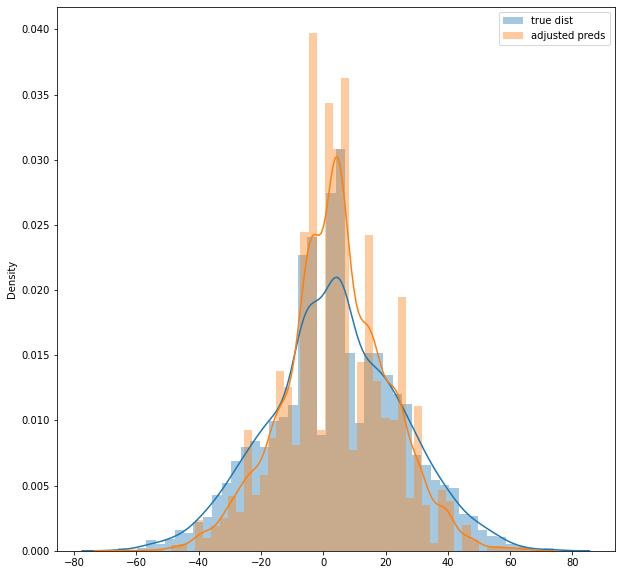

In [28]:
plt.figure(figsize=(10,10))
sns.distplot(train_df['home_score_differential'].ravel(), label = 'true dist')      
sns.distplot(y_pred_adjusted, label = 'adjusted preds')
#sns.distplot(y_pred, label = 'preds')
#sns.distplot(spreads_and_scores['Home_Score_Dif'].ravel(), label = 'spreads')
plt.legend()

In [29]:
################ CREATE PRCIES FOR SPREADS ###################

In [30]:
import matplotlib.pyplot as plt

probs = {}

spread_range = np.arange(min(spreads_and_scores['Spread']), max(spreads_and_scores['Spread'])+0.5, 0.5)
cols = ['Spread', 'Dif_Check_Col', 'Spread_minus_Check_Col']
spreads = []
median_values = []
num_of_samples = []
for i in spread_range:
    try:
        spread_pred = i
        new_spread_range = np.arange(i-3, i+3.5, 0.5)
        # difs = spreads_and_scores.loc[spreads_and_scores['Spread'] == i][cols]
        difs = spreads_and_scores[spreads_and_scores['Spread'].isin(new_spread_range)][cols]

        # remove any outliers by finding any games that are a 3 sigma event
        difs_from_spreads_median = difs['Spread_minus_Check_Col'].median()
        difs_from_spreads_std = round(difs['Spread_minus_Check_Col'].std(), 1)
        difs_max = difs['Spread_minus_Check_Col'].max()
        difs_min = difs['Spread_minus_Check_Col'].min()
        pos_3_stds = round(difs_from_spreads_median + (difs_from_spreads_std*3), 1)
        neg_3_stds = round(difs_from_spreads_median - (difs_from_spreads_std*3), 1)
        no_outliers = difs.loc[(difs['Spread_minus_Check_Col'] < pos_3_stds) & 
                               (difs['Spread_minus_Check_Col'] > neg_3_stds)]

        # remove some more by finding those that have never occurred before
        # start by fitting density
        if len(no_outliers) != 0:
            kde = KernelDensity(bandwidth=1, kernel='linear')
            sample = np.array(no_outliers['Dif_Check_Col']).reshape((len(no_outliers), 1))

            kde.fit(sample)

            # sample probabilities for a range of outcomes
            values = asarray([value for value in np.arange(no_outliers['Dif_Check_Col'].min(), 
                                                           no_outliers['Dif_Check_Col'].max()+0.5, 
                                                           0.5)])

            probabilities = kde.score_samples(values.reshape((len(values), 1)))
            probabilities = exp(probabilities)
            
            probs[i] = {'values': list(values),
                        'probabilities': list(probabilities),
                        'normalized_probs': list(NormalizeData(probabilities))}
    except:
        pass

In [31]:
import statsmodels as sm

In [32]:
df2 = spreads_and_scores[['Spread', 'Dif_Check_Col']]
df2

,Spread,Dif_Check_Col
0,-13.0,-28
1,-28.0,-38
2,-4.0,-17
3,-3.5,-3
4,20.5,13
...,...,...
12873,-6.5,-34
12874,25.5,44
12875,-28.5,-14
12876,-14.5,7


In [33]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

mod_prob = OrderedModel(df2['Dif_Check_Col'],
                        df2['Spread'],
                        distr='probit')

res_prob = mod_prob.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 4.002678
         Iterations: 281
         Function evaluations: 283
         Gradient evaluations: 283


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          Dif_Check_Col   Log-Likelihood:                -48697.
Model:                   OrderedModel   AIC:                         9.767e+04
Method:            Maximum Likelihood   BIC:                         9.871e+04
Date:                Tue, 26 Sep 2023                                         
Time:                        23:57:06                                         
No. Observations:               12166                                         
Df Residuals:                   12026                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Spread         0.0650      0.001     88.962      0.000       0.064       0.066
-79/-76       -5.6422      0.302    -18.704      0.000      -6.233      -5.051
-76/-74       -0.7551      0.564     -1.340      0.180      -1.860       0.349
-74/-73       -2.5594      1.024     -2.499      0.012      -4.567      -0.552
-73/-72       -2.1089      0.693     -3.043      0.002      -3.467      -0.750
-72/-71       -1.6752      0.446     -3.756      0.000      -2.549      -0.801
-71/-70       -2.2794      0.496     -4.595      0.000      -3.252      -1.307
-70/-69       -3.1038      0.699     -4.437      0.000      -4.475      -1.733
-69/-67       -2.7896      0.571     -4.885      0.000      -3.909      -1.670
-67/-66       -2.6200      0.497     -5.274      0.000      -3.594      -1.646
-66/-65       -2.2063      0.372     -5.935      0.000      -2.935      -1.478
-65/-64       -4.3165      1.028     -4.200      0.000      -6.331      -2.302
-64/-63       -2.9492      0.498     -5.923      0.000      -3.925      -1.973
-63/-62       -2.0475      0.285     -7.195      0.000      -2.605      -1.490
-62/-61       -2.6318      0.349     -7.549      0.000      -3.315      -1.949
-61/-60       -4.0783      0.700     -5.824      0.000      -5.451      -2.706
-60/-59       -3.4538      0.499     -6.921      0.000      -4.432      -2.476
-59/-58       -1.8572      0.204     -9.119      0.000      -2.256      -1.458
-58/-57       -2.9586      0.329     -8.980      0.000      -3.604      -2.313
-57/-56       -3.1533      0.350     -9.007      0.000      -3.839      -2.467
-56/-55       -1.7746      0.158    -11.220      0.000      -2.085      -1.465
-55/-54       -2.3720      0.193    -12.265      0.000      -2.751      -1.993
-54/-53       -3.5199      0.331    -10.643      0.000      -4.168      -2.872
-53/-52       -2.5813      0.198    -13.064      0.000      -2.969      -2.194
-52/-51       -1.9955      0.136    -14.716      0.000      -2.261      -1.730
-51/-50       -3.7450      0.314    -11.915      0.000      -4.361      -3.129
-50/-49       -2.9220      0.202    -14.455      0.000      -3.318      -2.526
-49/-48       -2.0453      0.121    -16.856      0.000      -2.283      -1.807
-48/-47       -2.8110      0.170    -16.580      0.000      -3.143      -2.479
-47/-46       -3.4475      0.228    -15.131      0.000      -3.894      -3.001
-46/-45       -2.7794      0.158    -17.563      0.000      -3.090      -2.469
-45/-44       -2.2090      0.112    -19.654      0.000      -2.429      -1.989
-44/-43       -3.1344      0.173    -18.158      0.000      -3.473      -2.796
-43/-42       -3.2172      0.175    -18.335      0.000      -3.561      -2.873
-42/-41       -2.1800      0.099    -22.035      0.000      -2.374      -1.986
-41/-40       -2.8231      0.132    -21.379      0.000      -3.082      -2.564
-40/-39       -3.6661      0.199    -18.422      0.000      -4.056      -3.276
-3

In [50]:
results_as_html = res_prob.summary().tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [51]:
spread_range = np.arange(-50, 50+0.5, 0.5)
results = []
probs = []
spreads = []
for i in spread_range:
    for j, k in zip(df[1:].reset_index()['index'], res_prob.predict(i)[0]):
        spreads.append(i)
        results.append(j.split('/')[0])
        probs.append(float(k))
    
result_probs = pd.DataFrame([spreads, results, probs]).T
result_probs.columns = ['spread', 'values', 'probabilities']
result_probs['spread'] = result_probs['spread'].astype(float)
result_probs['values'] = result_probs['values'].astype(float)

In [52]:
round_decimal = 4
percentage = 0.8
splitsies = percentage/2
dfs = []
for i in spread_range:
    spread_df = result_probs.loc[result_probs['spread'] == i]
    spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
    spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
    midpoint = spread_df.loc[spread_df['midpoint'] == 1]['probs_cumsum'].values[0]
    spread_df = spread_df.loc[(spread_df['probs_cumsum'] >= (midpoint-splitsies)) &
                              (spread_df['probs_cumsum'] <= (midpoint+splitsies))]
    spread_df['norm_probs'] = list(NormalizeData(spread_df['probabilities']))
    
    ######################
    push_perc = spread_df.loc[spread_df['midpoint'] == 1]['norm_probs'].iloc[0]
    rounded_push_perc = round(push_perc, round_decimal)
    norm_number = round((1-rounded_push_perc)/2, round_decimal)
    midpoint_idx = spread_df.index[spread_df['midpoint'] == 1][0]
    less_than = spread_df[spread_df.index < midpoint_idx]['norm_probs']
    more_than = spread_df[spread_df.index > midpoint_idx]['norm_probs']
    norm_lesses = []
    for i in (less_than)/less_than.sum():
        norm_lesses.append(round(i*norm_number, round_decimal))
    norm_mores = []
    for i in (more_than)/more_than.sum():
        norm_mores.append(round(i*norm_number, round_decimal))

    normed_probs_again = norm_lesses + [rounded_push_perc] + norm_mores
    spread_df['normed_probs_again'] = normed_probs_again    
    #######################
    
    dfs.append(spread_df)
    
result_probs = pd.concat(dfs).fillna(0)

/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df.loc[(spread_df['probabilities'] == spread_df['probabilities'].max()), 'midpoint'] = 1
/tmp/ipykernel_19850/627142279.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread_df['probs_cumsum'] = spread_df['probabilities'].cumsum()
/tmp/ipykernel_19850/627142279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [56]:
result_probs

,spread,values,probabilities,midpoint,probs_cumsum,norm_probs,normed_probs_again
0,-50.0,-79.0,0.008386,0.0,0.008386,0.011591,0.0137
1,-50.0,-76.0,0.018935,0.0,0.027321,0.026172,0.0308
2,-50.0,-74.0,0.005244,0.0,0.032565,0.007248,0.0085
3,-50.0,-73.0,0.009880,0.0,0.042445,0.013656,0.0161
4,-50.0,-72.0,0.019859,0.0,0.062304,0.027449,0.0323
...,...,...,...,...,...,...,...
27933,50.0,60.0,0.024551,0.0,0.746264,0.030725,0.0286
27934,50.0,61.0,0.013040,0.0,0.759304,0.016320,0.0152
27935,50.0,62.0,0.029961,0.0,0.789265,0.037496,0.0350
27936,50.0,63.0,0.061595,0.0,0.850860,0.077085,0.0719


In [67]:
result_probs_condensed = result_probs[['spread', 'values', 'normed_probs_again']]
result_probs_condensed.rename({'normed_probs_again': 'push_probs'}, axis=1, inplace=True)
result_probs_condensed['win_probs'] = result_probs_condensed.groupby('spread')['push_probs'].cumsum()
result_probs_condensed['win_probs'] = result_probs_condensed.groupby('spread')['win_probs'].shift(1).fillna(0)
result_probs_condensed['loss_probs'] = 1 - result_probs_condensed['win_probs'] - result_probs_condensed['push_probs']
probs_df = result_probs_condensed[['spread', 'values', 'loss_probs', 'push_probs', 'win_probs']]
probs_df.to_csv('test.csv')
new_values = np.arange(probs_df['values'].astype(float).min()+0.5, probs_df['values'].astype(float).max()+0.5, 1) 

/tmp/ipykernel_19850/4065872501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_probs_condensed.rename({'normed_probs_again': 'push_probs'}, axis=1, inplace=True)
/tmp/ipykernel_19850/4065872501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_probs_condensed['win_probs'] = result_probs_condensed.groupby('spread')['push_probs'].cumsum()
/tmp/ipykernel_19850/4065872501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

## 

In [ ]:
##############################################################

In [68]:
empty_frame = pd.DataFrame()
empty_frame['values'] = new_values

In [69]:
empty_frame['loss_probs'] = [0]*len(empty_frame)
empty_frame['push_probs'] = [0]*len(empty_frame)
empty_frame['win_probs'] = [0]*len(empty_frame)
new_probs_df = pd.merge(empty_frame, probs_df, how='outer').sort_values('values').reset_index().drop('index', axis=1)

/tmp/ipykernel_19850/1558430554.py:4: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  new_probs_df = pd.merge(empty_frame, probs_df, how='outer').sort_values('values').reset_index().drop('index', axis=1)


In [71]:
new_probs_df

,values,loss_probs,push_probs,win_probs,spread
0,-79.0,1.000000e+00,0.0000,0.0000,20.0
1,-79.0,1.000000e+00,0.0000,0.0000,17.0
2,-79.0,1.000000e+00,0.0000,0.0000,17.5
3,-79.0,1.000000e+00,0.0000,0.0000,18.0
4,-79.0,1.000000e+00,0.0000,0.0000,18.5
...,...,...,...,...,...
11138,68.0,2.000000e-04,0.0000,0.9998,-18.5
11139,68.0,1.000000e-04,0.0091,0.9908,34.0
11140,68.0,1.387779e-17,0.0029,0.9971,27.5
11141,68.0,-3.000000e-04,0.0099,0.9904,35.0


In [72]:
new_probs_df['win_probs'] = new_probs_df['push_probs'].cumsum()
new_probs_df['win_probs'] = new_probs_df['win_probs'].shift(1).fillna(0)
new_probs_df['loss_probs'] = 1 - new_probs_df['win_probs'] - new_probs_df['push_probs']

In [73]:
new_probs_df

,values,loss_probs,push_probs,win_probs,spread
0,-79.0,1.0000,0.0000,0.0000,20.0
1,-79.0,1.0000,0.0000,0.0000,17.0
2,-79.0,1.0000,0.0000,0.0000,17.5
3,-79.0,1.0000,0.0000,0.0000,18.0
4,-79.0,1.0000,0.0000,0.0000,18.5
...,...,...,...,...,...
11138,68.0,-199.9378,0.0000,200.9378,-18.5
11139,68.0,-199.9469,0.0091,200.9378,34.0
11140,68.0,-199.9498,0.0029,200.9469,27.5
11141,68.0,-199.9597,0.0099,200.9498,35.0


In [44]:
new_probs_df.loc[new_probs_df['win_probs'] <= 0, 'normalized_win_probs'] = (1-new_probs_df['loss_probs'])/2
new_probs_df.loc[new_probs_df['win_probs'] <= 0, 'normalized_loss_probs'] = 1-new_probs_df['normalized_win_probs']
new_probs_df.loc[new_probs_df['loss_probs'] <= 0, 'normalized_loss_probs'] = (1-new_probs_df['win_probs'])/2
new_probs_df.loc[new_probs_df['loss_probs'] <= 0, 'normalized_win_probs'] = 1-new_probs_df['normalized_loss_probs']
new_probs_df['normalized_win_probs'].fillna(new_probs_df['win_probs']/(new_probs_df['win_probs'] + new_probs_df['loss_probs']),
                                           inplace=True)
new_probs_df['normalized_loss_probs'].fillna(new_probs_df['loss_probs']/(new_probs_df['win_probs'] + new_probs_df['loss_probs']),
                                            inplace=True)

In [45]:
new_probs_df = new_probs_df.round(5)

In [46]:
new_probs_df.loc[new_probs_df['normalized_win_probs'] <= 0.5, 'cover_odds'] = (100/new_probs_df['normalized_win_probs'])-100
new_probs_df.loc[new_probs_df['normalized_win_probs'] > 0.5, 'cover_odds'] = ((new_probs_df['normalized_win_probs']*100)/(1-new_probs_df['normalized_win_probs']))*-1
new_probs_df.loc[new_probs_df['normalized_loss_probs'] <= 0.5, 'no_cover_odds'] = (100/new_probs_df['normalized_loss_probs'])-100
new_probs_df.loc[new_probs_df['normalized_loss_probs'] > 0.5, 'no_cover_odds'] = ((new_probs_df['normalized_loss_probs']*100)/(1-new_probs_df['normalized_loss_probs']))*-1

In [47]:
new_probs_df['cover_odds'] = new_probs_df['cover_odds'].round(0)
new_probs_df['no_cover_odds'] = new_probs_df['no_cover_odds'].round(0)

In [48]:
new_probs_df

,values,loss_probs,push_probs,win_probs,normalized_win_probs,normalized_loss_probs,cover_odds,no_cover_odds
0,-79.0,1.0000,0.0,0.0000,0.0000,1.0000,inf,-inf
1,-79.0,1.0000,0.0,0.0000,0.0000,1.0000,inf,-inf
2,-79.0,1.0000,0.0,0.0000,0.0000,1.0000,inf,-inf
3,-79.0,1.0000,0.0,0.0000,0.0000,1.0000,inf,-inf
4,-79.0,1.0000,0.0,0.0000,0.0000,1.0000,inf,-inf
...,...,...,...,...,...,...,...,...
11138,68.0,0.0581,0.0,0.9419,0.9419,0.0581,-1621.0,1621.0
11139,68.0,0.0581,0.0,0.9419,0.9419,0.0581,-1621.0,1621.0
11140,68.0,0.0581,0.0,0.9419,0.9419,0.0581,-1621.0,1621.0
11141,68.0,0.0581,0.0,0.9419,0.9419,0.0581,-1621.0,1621.0


In [49]:
new_probs_df.to_csv('test.csv')